___

# </a> Manish Sidhenkiwar</a>

LinkedIn: https://www.linkedin.com/in/msid02/
___


# Supervised Learning Capstone Project - Tree Methods

------

## GOAL: Create a model to predict whether or not a customer will Churn .
**churn=End of service**
----
----


## Part 0: Imports and Read in the Data

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import dataset
df = pd.read_csv('../DATA/Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Part 1: Quick Data Check

**TASK: Confirm quickly with .info() methods the datatypes and non-null values in your dataframe.**

In [4]:
# CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


**TASK: Get a quick statistical summary of the numeric columns with .describe() , you should notice that many columns are categorical, meaning you will eventually need to convert them to dummy variables.**

In [5]:
# CODE HERE
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# Part 2:  Exploratory Data Analysis

## General Feature Exploration

**TASK: Confirm that there are no NaN cells by displaying NaN values per feature column.**

In [6]:
# CODE HERE
df.isna().sum()
#df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**TASK:Display the balance of the class labels (Churn) with a Count Plot.**

In [7]:
# CODE HERE
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

<AxesSubplot:xlabel='Churn', ylabel='count'>

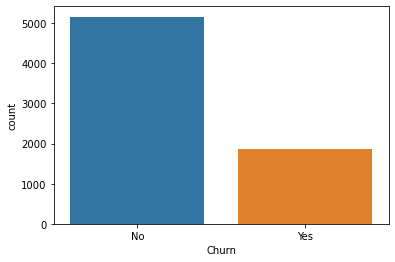

In [9]:
sns.countplot(data=df,x='Churn')

In [10]:
# In numeric
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [11]:
# Our target label(Churn) is slightly imbalanced

**TASK: Explore the distrbution of TotalCharges between Churn categories with a Box Plot or Violin Plot.**

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

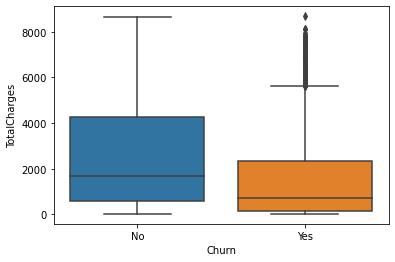

In [12]:
# CODE HERE
sns.boxplot(data=df,x='Churn',y='TotalCharges')

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

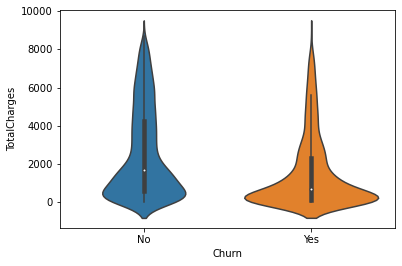

In [13]:
sns.violinplot(data=df,x='Churn',y='TotalCharges')

**TASK: Create a boxplot showing the distribution of TotalCharges per Contract type, also add in a hue coloring based on the Churn class.**

In [14]:
#CODE HERE
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

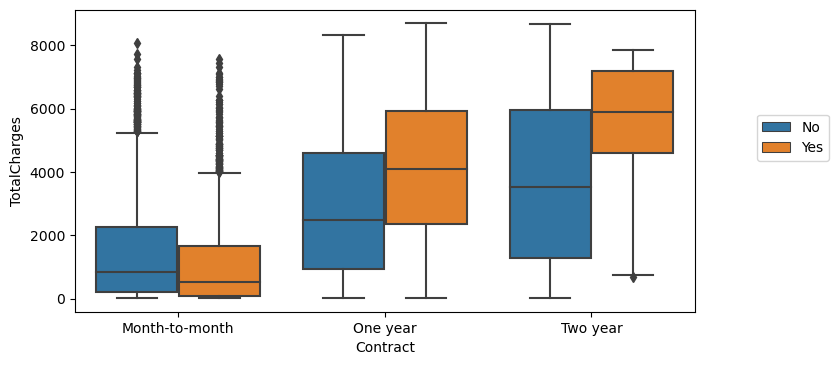

In [15]:
plt.figure(figsize=(8,4),dpi=100)
sns.boxplot(data=df,x='Contract',y='TotalCharges',hue='Churn')
plt.legend(loc=[1.1,0.5])

**TASK: Create a bar plot showing the correlation of the features to the class label.**

In [16]:
#CODE HERE
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [17]:
# convert categorical col to dummy variables.
# creating dummy variables as corr works only on numeric columns

In [18]:
# Leaving customer ID,tenure etc columns as it has alot of unique values.
df['customerID'].unique()

array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

In [19]:
pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']])

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,0,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,1,0
1,0,0,1,1,0,1,0,0,1,1,...,1,0,1,0,0,0,0,1,1,0
2,0,0,1,1,0,1,0,0,1,1,...,0,0,0,1,0,0,0,1,0,1
3,0,0,1,1,0,1,0,1,0,0,...,1,0,1,0,1,0,0,0,1,0
4,0,1,0,1,0,1,0,0,1,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,0,1,0,1,0,1,0,...,1,0,0,1,0,0,0,1,1,0
7028,0,1,0,0,1,0,1,0,1,0,...,1,0,0,1,0,1,0,0,1,0
7029,0,1,0,0,1,0,1,1,0,0,...,0,0,0,1,0,0,1,0,1,0
7030,1,0,1,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1


In [20]:
# For pd.get_dummies,
# for coorrelation,don't drop copy columns like male,female which has same info.,as its good for visualization.
# use drop first = True in machine learning modelling to avoid multi collinearity or dummy variable trap.

In [21]:
corr_df=pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 
 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService',
   'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']]).corr()

In [22]:
# Since our goal is to find how many churn (Yes churn),lets focus on Yes churn only.
corr_df['Churn_Yes']

SeniorCitizen                              0.150541
gender_Female                              0.008545
gender_Male                               -0.008545
Partner_No                                 0.149982
Partner_Yes                               -0.149982
Dependents_No                              0.163128
Dependents_Yes                            -0.163128
PhoneService_No                           -0.011691
PhoneService_Yes                           0.011691
MultipleLines_No                          -0.032654
MultipleLines_No phone service            -0.011691
MultipleLines_Yes                          0.040033
OnlineSecurity_No                          0.342235
OnlineSecurity_No internet service        -0.227578
OnlineSecurity_Yes                        -0.171270
OnlineBackup_No                            0.267595
OnlineBackup_No internet service          -0.227578
OnlineBackup_Yes                          -0.082307
DeviceProtection_No                        0.252056
DeviceProtec

In [23]:
# sort to make it better
corr_df['Churn_Yes'].sort_values()

Churn_No                                  -1.000000
Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup

In [24]:
# churn_no has -ve corr to churn_yes & churn_yes has 100pc corr to itself,thats obvious.So filter both out using slicing.
corr_df['Churn_Yes'].sort_values().iloc[1:-1]

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

In [25]:
#Lets assign it to new value for our plot
corr_yes_churn= corr_df['Churn_Yes'].sort_values().iloc[1:-1]  # you can directly put it in plot without naming it.

<AxesSubplot:>

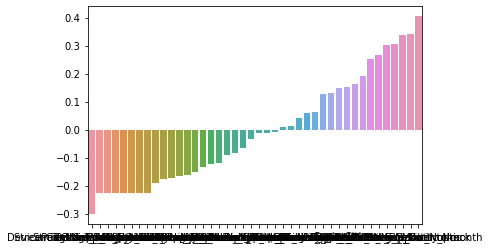

In [26]:
# plot using index & values for our corr_yes_churn
#sns.barplot(x=corr_yes_churn.index,y=corr_yes_churn.values)
sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)

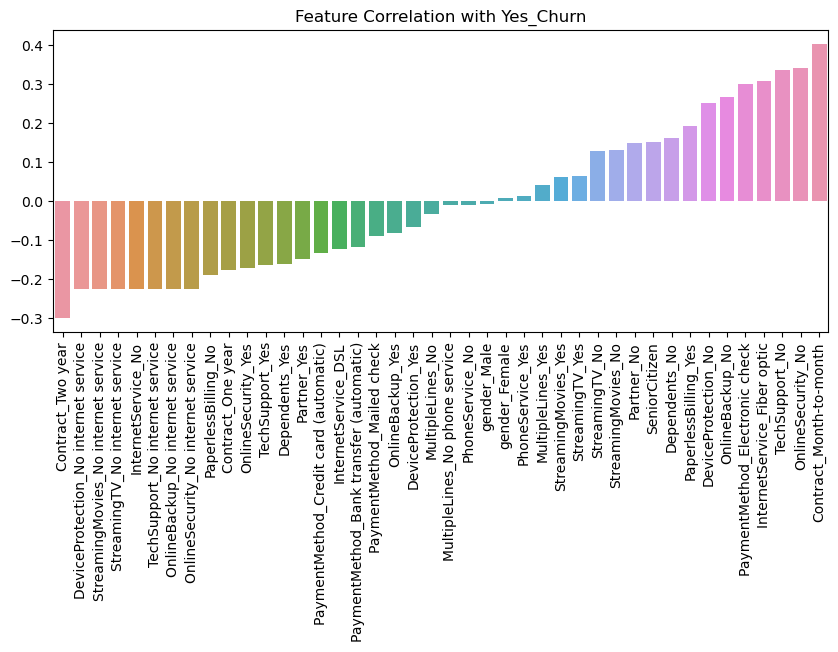

In [27]:
plt.figure(figsize=(10,4),dpi=100)
sns.barplot(x=corr_yes_churn.index,y=corr_yes_churn.values)
#sns.barplot(x=corr_df['Churn_Yes'].sort_values().iloc[1:-1].index,y=corr_df['Churn_Yes'].sort_values().iloc[1:-1].values)
plt.title('Feature Correlation with Yes_Churn')
plt.xticks(rotation=90);

**As you can see,contract two year is least churn ,as it makes sense.**

**People with bigger tenure contract ,tend to stick to the service more than monthly contract which as you can see has most churn rate.**

**In montly contract,most of the people try the service & tend to decide if to continue or not.
Most churn in services depend on first month, due to competition from other service providers.**

---
---

# Part 3: Churn Analysis

**This section focuses on segementing customers based on their tenure, creating "cohorts", allowing us to examine differences between customer cohort segments.**

**TASK: What are the 3 contract types available?**

In [28]:
# CODE HERE
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [29]:
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

**TASK: Create a histogram displaying the distribution of 'tenure' column, which is the amount of months a customer was or has been on a customer.**

<AxesSubplot:xlabel='tenure', ylabel='Count'>

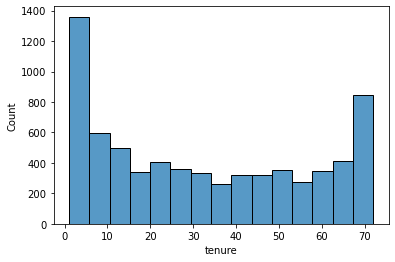

In [30]:
#CODE HERE
sns.histplot(data=df,x='tenure')

<AxesSubplot:xlabel='tenure', ylabel='Count'>

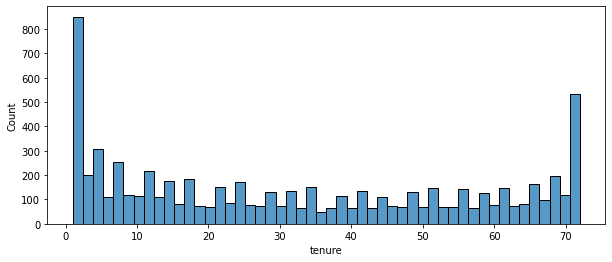

In [31]:
plt.figure(figsize=(10,4))
sns.histplot(data=df,x='tenure',bins=50)

<Figure size 720x288 with 0 Axes>

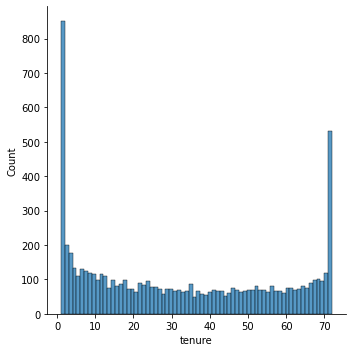

In [32]:
#CODE HERE
plt.figure(figsize=(10,4))
sns.displot(data=df,x='tenure',bins=70)

<Figure size 720x288 with 0 Axes>

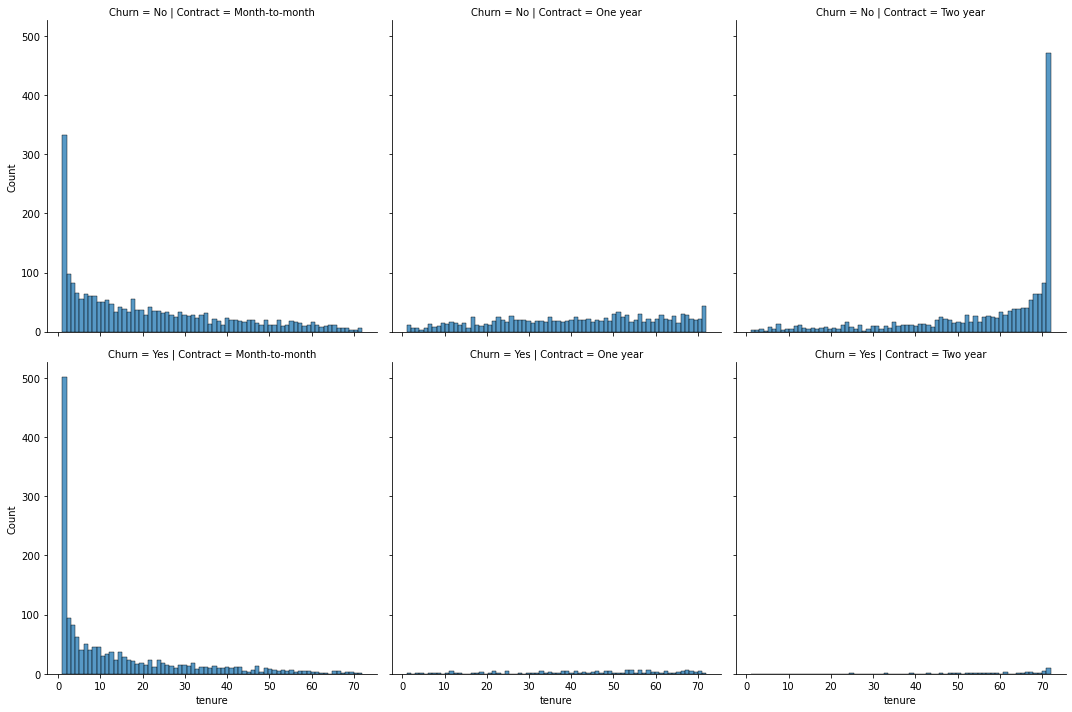

In [33]:
#separate histogram using two additional features(churn,contract)
plt.figure(figsize=(10,4))
sns.displot(data=df,x='tenure',bins=70,row='Churn',col='Contract')

** As you can see from displot,one yr & two yr contract has very less likelyhood of churn.**

** So,companies need to focus on how to stop churn in month to month type of contracts.

**TASK: Display a scatter plot of Total Charges versus Monthly Charges, and color hue by Churn.**

In [34]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

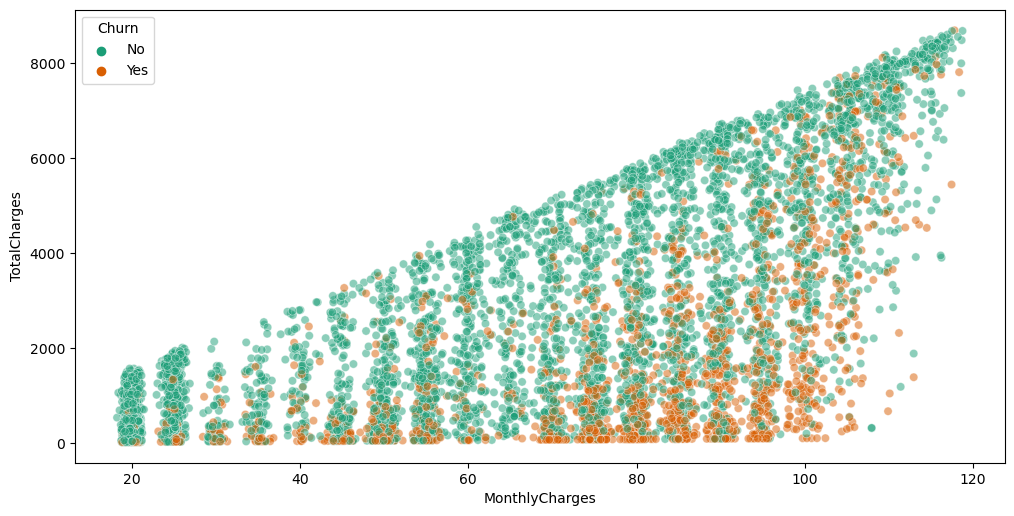

In [35]:
#CODE HERE
plt.figure(figsize=(12,6),dpi=100)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Churn',alpha=0.5,palette='Dark2',linewidth=0.5)

In [36]:
# Lets go deeper in tenure to see clearly monthwise cohorts(churn per month)

### Creating Cohorts based on Tenure

**Let's begin by treating each unique tenure length, 1 month, 2 month, 3 month...N months as its own cohort.**

**TASK: Treating each unique tenure group as a cohort, calculate the Churn rate (percentage that had Yes Churn) per cohort. **

In [37]:
#CODE HERE
np.sort(df['tenure'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72], dtype=int64)

In [38]:
# Lets find churn per each unique values of tenure(month)

In [39]:
#df.groupby(['tenure','Churn']).count()
df.groupby(['Churn','tenure']).count()

customerID  gender  SeniorCitizen  Partner  Dependents  \
Churn tenure                                                           
No    1              233     233            233      233         233   
      2              115     115            115      115         115   
      3              106     106            106      106         106   
      4               93      93             93       93          93   
      5               69      69             69       69          69   
...                  ...     ...            ...      ...         ...   
Yes   68               9       9              9        9           9   
      69               8       8              8        8           8   
      70              11      11             11       11          11   
      71               6       6              6        6           6   
      72               6       6              6        6           6   

              PhoneService  MultipleLines  InternetService  OnlineSecurity  \
Churn tenure                                                                 
No    1                233            233              233             233   
      2                115            115              115             115   
      3                106            106              106             106   
      4                 93             93               93              93   
      5                 69             69               69              69   
...                    ...            ...              ...             ...   
Yes   68                 9              9                9               9   
      69                 8              8                8               8   
      70                11             11               11              11   
      71                 6              6                6               6   
      72                 6              6                6               6   

              OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
Churn tenure                                                             
No    1                233               233          233          233   
      2                115               115          115          115   
      3                106               106          106          106   
      4                 93                93           93           93   
      5                 69                69           69           69   
...                    ...               ...          ...          ...   
Yes   68                 9                 9            9            9   
      69                 8                 8            8            8   
      70                11                11           11           11   
      71                 6                 6            6            6   
      72                 6                 6            6            6   

              StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
Churn tenure                                                               
No    1                   233       233               233            233   
      2                   115       115               115            115   
      3                   106       106               106            106   
      4                    93        93                93             93   
      5                    69        69                69             69   
...                       ...       ...               ...            ...   
Yes   68                    9         9                 9              9   
      69                    8         8                 8              8   
      70                   11        11                11             11   
      71                    6         6                 6              6   
      72                    6         6                 6              6   

              MonthlyCharges  TotalCharges  
Churn tenure                                
No    1             

In [40]:
#Transpose to see better
#df.groupby(['tenure','Churn']).count().transpose()
df.groupby(['Churn','tenure']).count().transpose()    #its better

Churn              No                                        ... Yes        \
tenure             1    2    3   4   5   6   7   8   9   10  ...  63 64 65   
customerID        233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
gender            233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
SeniorCitizen     233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
Partner           233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
Dependents        233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
PhoneService      233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
MultipleLines     233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
InternetService   233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
OnlineSecurity    233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
OnlineBackup      233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
DeviceProtection  233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
TechSupport       233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
StreamingTV       233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
StreamingMovies   233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
Contract          233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
PaperlessBilling  233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
PaymentMethod     233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
MonthlyCharges    233  115  106  93  69  70  80  81  73  71  ...   4  4  9   
TotalCharges      233  115  106  93  69  70  80  81  73  71  ...   4  4  9   

Churn                                     
tenure            66  67 68 69  70 71 72  
customerID        13  10  9  8  11  6  6  
gender            13  10  9  8  11  6  6  
SeniorCitizen     13  10  9  8  11  6  6  
Partner           13  10  9  8  11  6  6  
Dependents        13  10  9  8  11  6  6  
PhoneService      13  10  9  8  11  6  6  
MultipleLines     13  10  9  8  11  6  6  
InternetService   13  10  9  8  11  6  6  
OnlineSecurity    13  10  9  8  11  6  6  
OnlineBackup      13  10  9  8  11  6  6  
DeviceProtection  13  10  9  8  11  6  6  
TechSupport       13  10  9  8  11  6  6  
StreamingTV       13  10  9  8  11  6  6  
StreamingMovies   13  10  9  8  11  6  6  
Contract          13  10  9  8  11  6  6  
PaperlessBilling  13  10  9  8  11  6  6  
PaymentMethod     13  10  9  8  11  6  6  
MonthlyCharges    13  10  9  8  11  6  6  
TotalCharges      13  10  9  8  11  6  6  

[19 rows x 144 columns]

In [41]:
# lets grab yes churn
df.groupby(['Churn','tenure']).count().transpose()['Yes']

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
gender,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
SeniorCitizen,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Partner,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
Dependents,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
PhoneService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
MultipleLines,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
InternetService,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineSecurity,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6
OnlineBackup,380,123,94,83,64,40,51,42,46,45,...,4,4,9,13,10,9,8,11,6,6


In [42]:
# separate churn by naming it 
yes_churn= df.groupby(['Churn','tenure']).count().transpose()['Yes']
No_churn =df.groupby(['Churn','tenure']).count().transpose()['No']

In [43]:
No_churn

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
gender,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
SeniorCitizen,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Partner,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
Dependents,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
PhoneService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
MultipleLines,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
InternetService,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineSecurity,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356
OnlineBackup,233,115,106,93,69,70,80,81,73,71,...,68,76,67,76,88,91,87,108,164,356


In [44]:
# to find percentage of ppl churned,amt of ppl churn / total (yes churn+no churn)
(yes_churn / (yes_churn+No_churn))*100

tenure,1,2,3,4,5,6,7,8,9,10,...,63,64,65,66,67,68,69,70,71,72
customerID,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
gender,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
SeniorCitizen,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
Partner,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
Dependents,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
PhoneService,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
MultipleLines,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
InternetService,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
OnlineSecurity,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459
OnlineBackup,61.990212,51.680672,47.0,47.159091,48.120301,36.363636,38.931298,34.146341,38.655462,38.793103,...,5.555556,5.0,11.842105,14.606742,10.204082,9.0,8.421053,9.243697,3.529412,1.657459


In [45]:
#to grab particular row or column to analyse,lets first assign it a name.
churn_rate=(yes_churn / (yes_churn+No_churn))*100

In [46]:
churn_rate.transpose()['customerID']

tenure
1     61.990212
2     51.680672
3     47.000000
4     47.159091
5     48.120301
        ...    
68     9.000000
69     8.421053
70     9.243697
71     3.529412
72     1.657459
Name: customerID, Length: 72, dtype: float64

**TASK: Now that you have Churn Rate per tenure group 1-72 months, create a plot showing churn rate per months of tenure.**

<AxesSubplot:xlabel='tenure'>

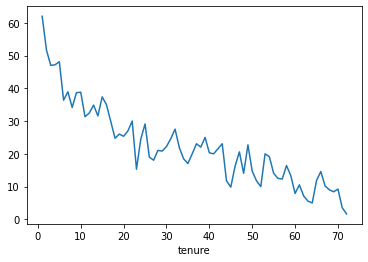

In [47]:
churn_rate.transpose()['customerID'].plot()

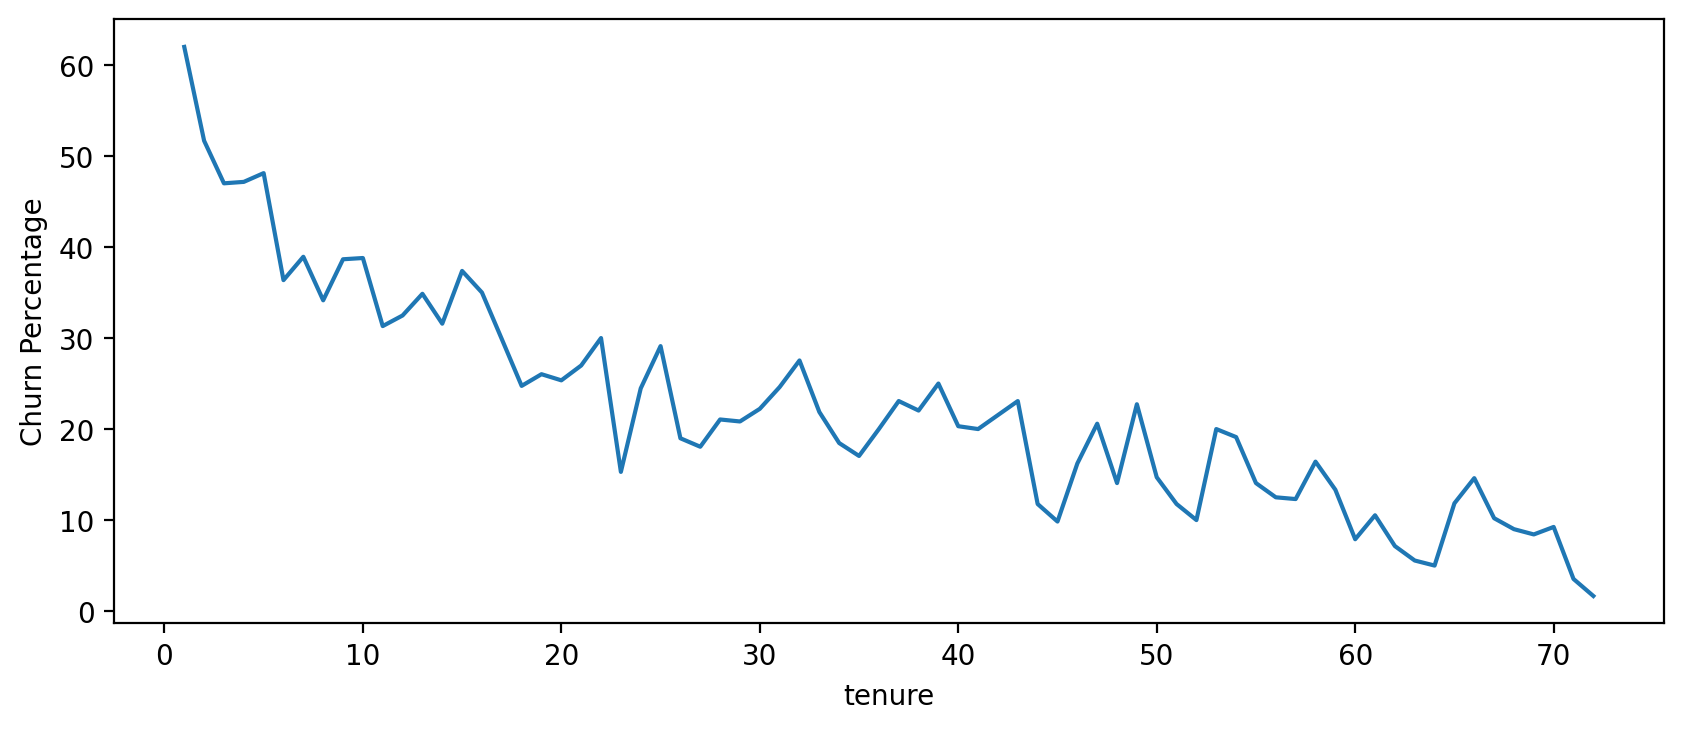

In [48]:
plt.figure(figsize=(10,4),dpi=200)
churn_rate.iloc[0].plot()
plt.ylabel('Churn Percentage');

### Broader Cohort Groups
**TASK: Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories:**
   * '0-12 Months'
   * '12-24 Months'
   * '24-48 Months'
   * 'Over 48 Months'    

In [49]:
# CODE HERE
def cohort(tenure):
    if tenure < 13:
        return '0-12 Months'
    elif tenure < 25:
        return '12-24 Months'
    elif tenure < 49:
        return '24-48 Months'
    else:
        return 'Over 48 Months'

In [50]:
df['Tenure_Cohort']=df['tenure'].apply(cohort)

In [51]:
df['Tenure_Cohort'].unique()

array(['0-12 Months', '24-48 Months', '12-24 Months', 'Over 48 Months'],
      dtype=object)

In [52]:
df[['tenure','Tenure_Cohort']].head()

,tenure,Tenure_Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months


In [53]:
# Seems fine.

**TASK: Create a scatterplot of Total Charges versus Monthly Charts,colored by Tenure Cohort defined in the previous task.**

In [54]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure_Cohort'],
      dtype='object')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

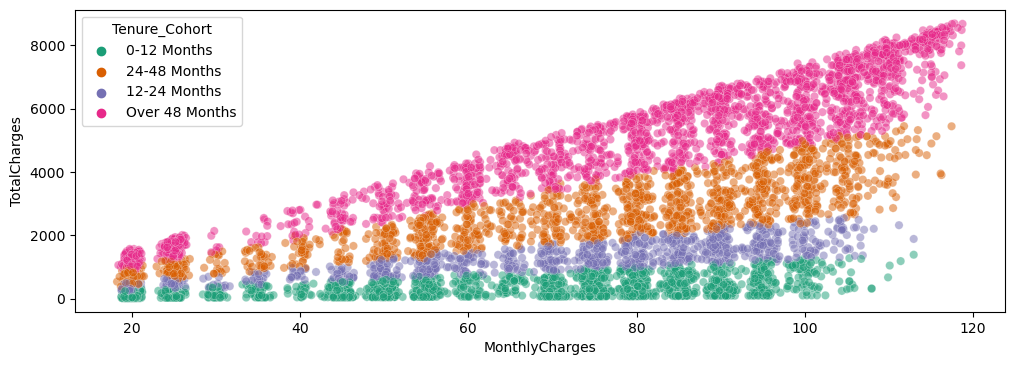

In [55]:
#CODE HERE
plt.figure(figsize=(12,4),dpi=100)
sns.scatterplot(data=df,x='MonthlyCharges',y='TotalCharges',hue='Tenure_Cohort',alpha=0.5,linewidth=0.3,palette='Dark2')


**TASK: Create a count plot showing the churn count per cohort.**

<AxesSubplot:xlabel='Tenure_Cohort', ylabel='count'>

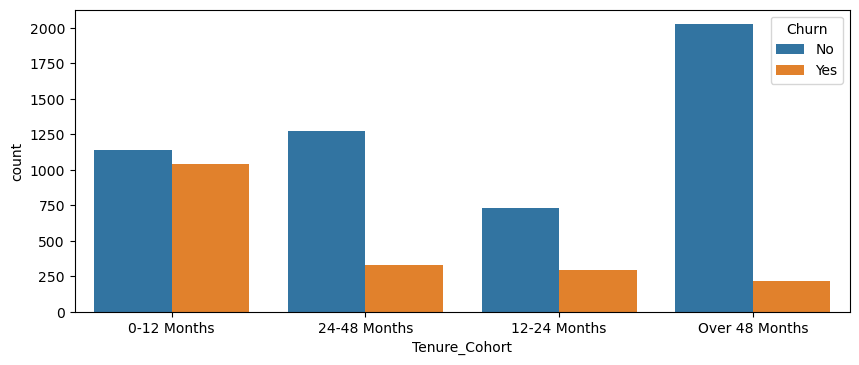

In [56]:
# CODE HERE
plt.figure(figsize=(10,4),dpi=100)
sns.countplot(data=df,x='Tenure_Cohort',hue='Churn')

## As u can see,the more longer period customer stays in the service,customer is less likely to churn,which is a good thing.

**TASK: Create a grid of Count Plots showing counts per Tenure Cohort, separated out by contract type and colored by the Churn hue.**

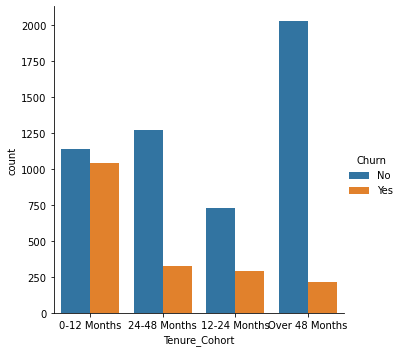

In [57]:
#You can't do this using count plot,use catplot and make kind='count'
sns.catplot(data=df,x='Tenure_Cohort',hue='Churn',kind='count')

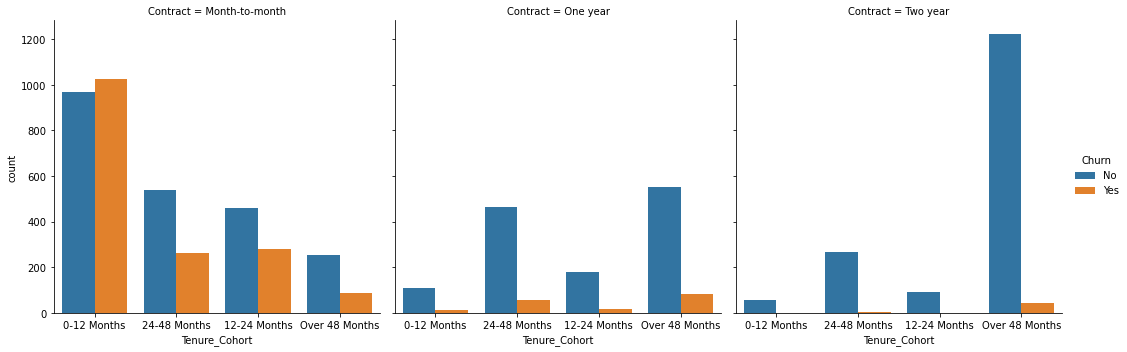

In [58]:
#You can't do this using count plot,use catplot and make kind='count'
sns.catplot(data=df,x='Tenure_Cohort',hue='Churn',kind='count',
           col='Contract')

### We can see same observation here as well.Month to Month has more churn than yr contracts.

-----

# Part 4: Predictive Modeling

**Let's explore 4 different tree based methods: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting.**


## Single Decision Tree

**TASK : Separate out the data into X features and Y label. Create dummy variables where necessary and note which features are not useful and should be dropped.**

In [59]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Cohort
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12 Months
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,24-48 Months
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12 Months
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,24-48 Months
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12 Months


In [60]:
# AS u can see,there are alot of categorical features,we need to convert it to dummy variables
# customer id is unique variable identifier as it has unique value for each row,same as index,hence we don't need that.

In [61]:
X=df.drop(['Churn','customerID'],axis=1)

In [62]:
#convert to dummy variables,you can remove same info columns to avoid dummy variable trap.
X=pd.get_dummies(X,drop_first=True)
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Tenure_Cohort_12-24 Months,Tenure_Cohort_24-48 Months,Tenure_Cohort_Over 48 Months
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,1,1,1,1,0,1,...,1,1,0,1,0,0,1,1,0,0
7028,0,72,103.20,7362.90,0,1,1,1,0,1,...,1,1,0,1,1,0,0,0,0,1
7029,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7030,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0


In [63]:
y=df['Churn']

In [64]:
#CODE HERE
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**TASK: Decision Tree Perfomance:**
   1. Train a single decision tree model (feel free to grid search for optimal hyperparameters).
   2. Evaluate performance metrics from decision tree, including classification report and plotting a confusion matrix.
   2. Calculate feature importances from the decision tree.
   4. OPTIONAL: Plot your tree, note, the tree could be huge depending on your pruning, so it may crash your notebook if you display it with plot_tree.

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [67]:
#You can do gridsearchCV to find best hyperparameters.
model=DecisionTreeClassifier(max_depth=6)

In [68]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [69]:
base_preds=model.predict(X_test)

In [70]:
#Model Evaluation
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [71]:
confusion_matrix(y_test,base_preds)

array([[498,  59],
       [ 75,  72]], dtype=int64)

In [72]:
print(classification_report(y_test,base_preds))

              precision    recall  f1-score   support

          No       0.87      0.89      0.88       557
         Yes       0.55      0.49      0.52       147

    accuracy                           0.81       704
   macro avg       0.71      0.69      0.70       704
weighted avg       0.80      0.81      0.81       704



Any model will perform better on class that has more rows of data.In our label it was No churn,hence its perfoming great on no churn than yes churn.

C:\Users\manis\anaconda3\envs\new_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


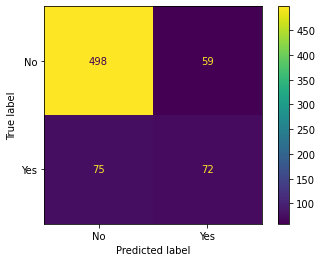

In [73]:
plot_confusion_matrix(model,X_test,y_test)

In [74]:
#Almost 134(75+59) labels are misclassified,hence low accuracy of 81 pc.

In [75]:
model.feature_importances_

array([0.01082504, 0.42391407, 0.04797027, 0.06231285, 0.00123697,
       0.        , 0.        , 0.        , 0.00785158, 0.01243191,
       0.31406016, 0.02628952, 0.        , 0.00837585, 0.        ,
       0.00534132, 0.        , 0.        , 0.        , 0.00786752,
       0.        , 0.        , 0.        , 0.        , 0.01002118,
       0.02706543, 0.        , 0.        , 0.03443632, 0.        ,
       0.        , 0.        , 0.        ])

In [76]:
X.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Tenure_Cohort_12-24 Months', 'Tenure_Cohort_24-48 Months',
       'Tenure_Cohort_Over 48 Months'],
      dtype='object')

In [77]:
pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance for Decision Tree'])

,Feature Importance for Decision Tree
SeniorCitizen,0.010825
tenure,0.423914
MonthlyCharges,0.047970
TotalCharges,0.062313
gender_Male,0.001237
Partner_Yes,0.000000
Dependents_Yes,0.000000
PhoneService_Yes,0.000000
MultipleLines_No phone service,0.007852
MultipleLines_Yes,0.012432


In [78]:
imp_feats=pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Feature Importance for Decision Tree'])

In [79]:
imp_feats=imp_feats.sort_values('Feature Importance for Decision Tree')

In [80]:
imp_feats

,Feature Importance for Decision Tree
DeviceProtection_No internet service,0.000000
Tenure_Cohort_12-24 Months,0.000000
PaymentMethod_Mailed check,0.000000
PaymentMethod_Credit card (automatic),0.000000
PaperlessBilling_Yes,0.000000
StreamingMovies_Yes,0.000000
StreamingMovies_No internet service,0.000000
StreamingTV_Yes,0.000000
StreamingTV_No internet service,0.000000
TechSupport_No internet service,0.000000


In [81]:
#filter out Zero(0) feature imp
imp_feats=imp_feats[imp_feats['Feature Importance for Decision Tree']>0]

In [82]:
imp_feats

,Feature Importance for Decision Tree
gender_Male,0.001237
OnlineBackup_Yes,0.005341
MultipleLines_No phone service,0.007852
TechSupport_Yes,0.007868
OnlineSecurity_Yes,0.008376
Contract_One year,0.010021
SeniorCitizen,0.010825
MultipleLines_Yes,0.012432
InternetService_No,0.026290
Contract_Two year,0.027065


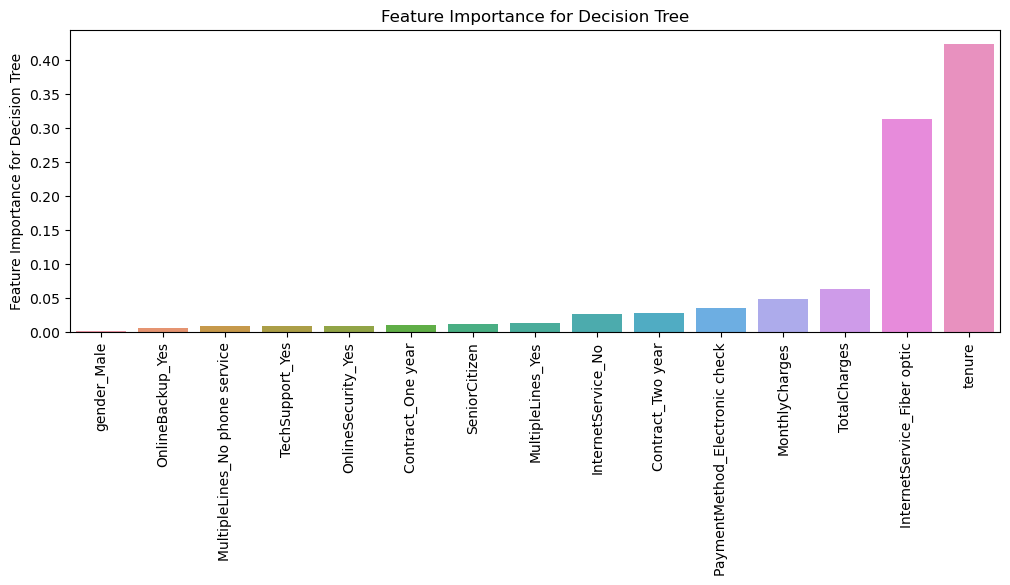

In [83]:
#Lets plot this
plt.figure(figsize=(12,4),dpi=100)
sns.barplot(data=imp_feats,x=imp_feats.index,y='Feature Importance for Decision Tree')
plt.title('Feature Importance for Decision Tree')
plt.xticks(rotation=90);

## From above plot ,tenure,internet_fiber_optic,total charges are most important features to decide if customer wil churn or not.

In [84]:
from sklearn.tree import plot_tree

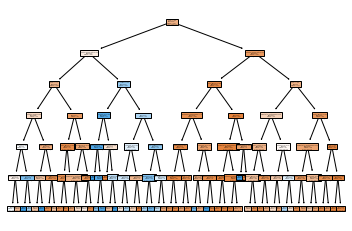

In [85]:
plot_tree(model,filled=True,feature_names=X.columns);

## Random Forest

**TASK: Create a Random Forest model and create a classification report and confusion matrix from its predicted results on the test set.**

In [86]:
#Its better than Decision tree model.
from sklearn.ensemble import RandomForestClassifier

In [87]:
rf_model=RandomForestClassifier()

In [88]:
rf_model.fit(X_train,y_train)

RandomForestClassifier()

In [89]:
preds=rf_model.predict(X_test)

In [90]:
confusion_matrix(y_test,preds)

array([[494,  63],
       [ 79,  68]], dtype=int64)

In [91]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.86      0.89      0.87       557
         Yes       0.52      0.46      0.49       147

    accuracy                           0.80       704
   macro avg       0.69      0.67      0.68       704
weighted avg       0.79      0.80      0.79       704



In [92]:
# 80pc accuracy.Lets tune hyperparameters
rf_model=RandomForestClassifier(max_depth=6)

In [93]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=6)

In [94]:
preds=rf_model.predict(X_test)

In [95]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

          No       0.86      0.92      0.89       557
         Yes       0.60      0.44      0.51       147

    accuracy                           0.82       704
   macro avg       0.73      0.68      0.70       704
weighted avg       0.81      0.82      0.81       704



In [96]:
#We have slightly improved our performance(82pc accuracy) without overfitting.

C:\Users\manis\anaconda3\envs\new_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


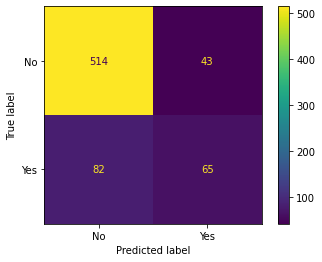

In [97]:
plot_confusion_matrix(rf_model,X_test,y_test)

## As u can see,random forest is performing worse than decision tree as churn missclassification has increased(82)

In [98]:
#use gridsearch cv to find best hyperparameters if it can improve the performance.

## Boosted Trees

**TASK: Use AdaBoost or Gradient Boosting to create a model and report back the classification report and plot a confusion matrix for its predicted results**

In [99]:
#CODE HERE
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [100]:
#ADA model
ada_model= AdaBoostClassifier()

In [101]:
#gradient boosting_model
gb_model=GradientBoostingClassifier()

In [102]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier()

In [103]:
gb_model.fit(X_train,y_train)

GradientBoostingClassifier()

In [104]:
ada_preds=ada_model.predict(X_test)

In [105]:
gb_model_preds=gb_model.predict(X_test)

In [106]:
print(classification_report(y_test,ada_preds))

              precision    recall  f1-score   support

          No       0.88      0.90      0.89       557
         Yes       0.60      0.54      0.57       147

    accuracy                           0.83       704
   macro avg       0.74      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



In [107]:
print(classification_report(y_test,gb_model_preds))

              precision    recall  f1-score   support

          No       0.87      0.90      0.89       557
         Yes       0.57      0.50      0.53       147

    accuracy                           0.82       704
   macro avg       0.72      0.70      0.71       704
weighted avg       0.81      0.82      0.81       704



In [108]:
#  WE are getting better recall & better accuracy from ada boost model than gb model.

C:\Users\manis\anaconda3\envs\new_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


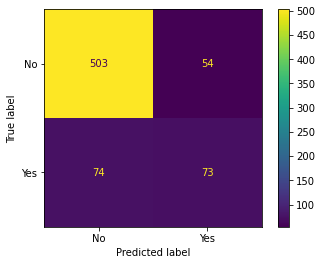

In [109]:
plot_confusion_matrix(gb_model,X_test,y_test)

C:\Users\manis\anaconda3\envs\new_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


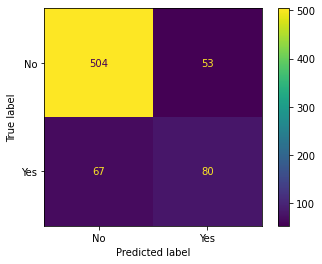

In [110]:
plot_confusion_matrix(ada_model,X_test,y_test)

In [111]:
# 67 churn is little better than before .
# you can improve accuracies by tinkering with hyperparameters.

In [112]:
ada_model= AdaBoostClassifier(n_estimators=60)

In [113]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=60)

In [114]:
ada_preds=ada_model.predict(X_test)

In [115]:
print(classification_report(y_test,ada_preds))

              precision    recall  f1-score   support

          No       0.88      0.91      0.90       557
         Yes       0.61      0.53      0.57       147

    accuracy                           0.83       704
   macro avg       0.75      0.72      0.73       704
weighted avg       0.82      0.83      0.83       704



C:\Users\manis\anaconda3\envs\new_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


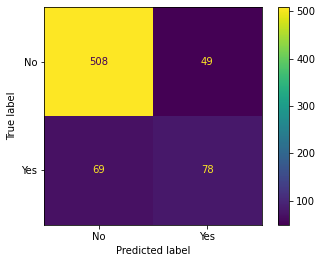

In [116]:
plot_confusion_matrix(ada_model,X_test,y_test)

**TASK: Analyze your results, which model performed best for you?**

## With base models, we got best performance from an AdaBoostClassifier, but note, we didn't do any gridsearching AND most models performed about the same on the data set.

### Thanks!

----
----